In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, mode

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

df = pd.read_csv("lab-eda-univariate/amz_uk_price_prediction_dataset.csv")
df.head()


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [3]:
category_counts = df['category'].value_counts()
top5_categories = category_counts.head(5)
top5_categories


category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

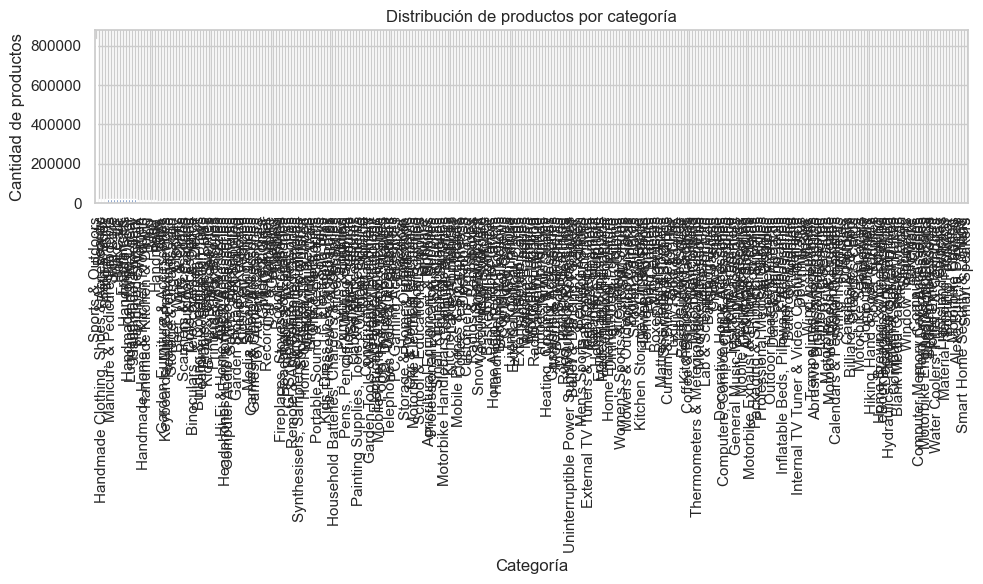

In [4]:
category_counts.plot(kind='bar')
plt.title('Distribución de productos por categoría')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de productos')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


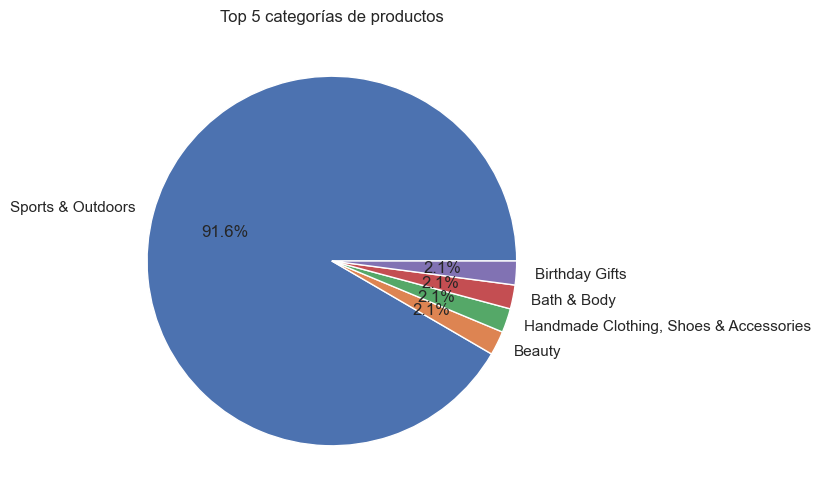

In [5]:
top5_categories.plot(kind='pie', autopct='%1.1f%%')
plt.title('Top 5 categorías de productos')
plt.ylabel('')
plt.show()


Medidas de centralidad

In [6]:
price_mean = df['price'].mean()
price_median = df['price'].median()
price_mode = df['price'].mode()[0]

price_mean, price_median, price_mode


(np.float64(89.24380943923663), np.float64(19.09), np.float64(9.99))

Medidas de dispersión

In [7]:

price_var = df['price'].var()
price_std = df['price'].std()
price_range = df['price'].max() - df['price'].min()
price_iqr = df['price'].quantile(0.75) - df['price'].quantile(0.25)

price_var, price_std, price_range, price_iqr


(np.float64(119445.48532254907),
 np.float64(345.60886175349884),
 np.float64(100000.0),
 np.float64(36.0))

In [ ]:
Histograma de precios

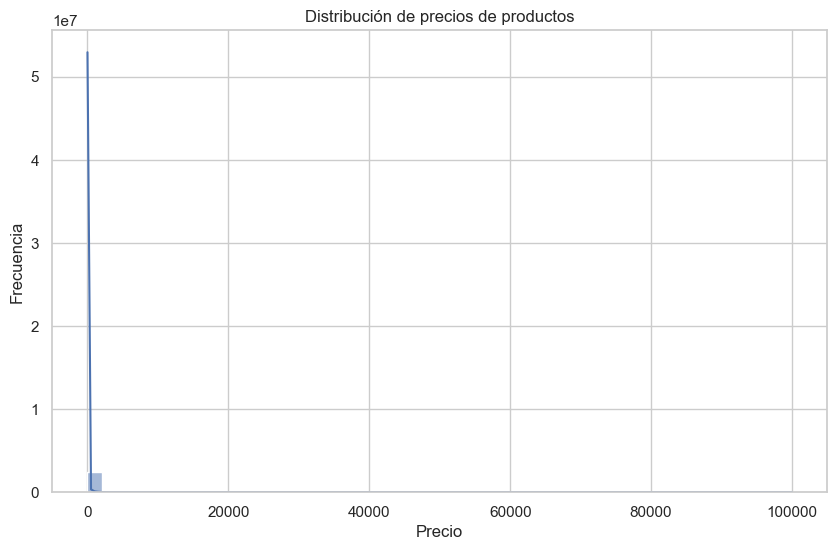

In [12]:
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribución de precios de productos')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()


<Axes: xlabel='price', ylabel='Count'>

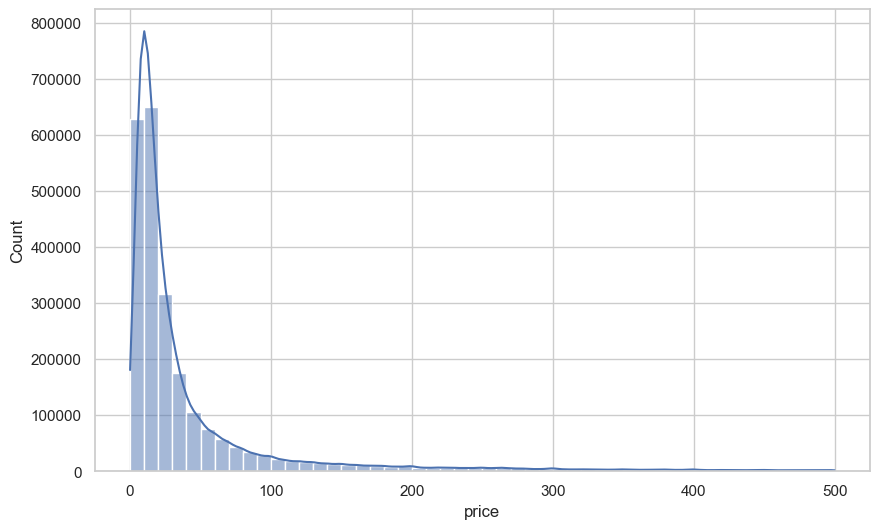

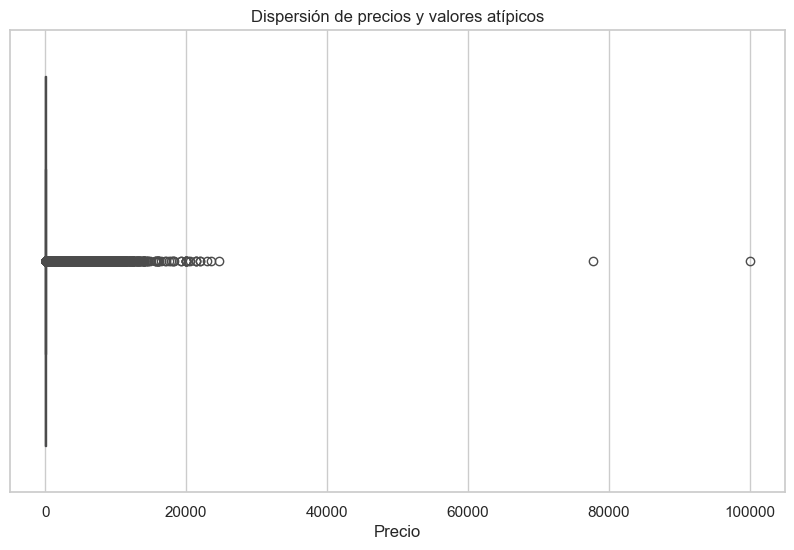

In [10]:
## Diagrama de caja

sns.boxplot(x=df['price'])
plt.title('Dispersión de precios y valores atípicos')
plt.xlabel('Precio')
plt.show()

In [24]:
## Medidas de centralidad
rating_mean = df['stars'].mean()
rating_median = df['stars'].median()
rating_mode = df['stars'].mode()[0]

print(f"Media: {rating_mean:.2f}")
print(f"Mediana: {rating_median}")
print(f"Moda: {rating_mode}")


Media: 2.15
Mediana: 0.0
Moda: 0.0


In [ ]:
## Medidas de dispersión

rating_var = df['stars'].var()
rating_std = df['stars'].std()
rating_iqr = df['stars'].quantile(0.75) - df['stars'].quantile(0.25)

print(f"Varianza: {rating_var:.2f}")
print(f"Desviación estándar: {rating_std:.2f}")
print(f"Rango intercuartílico (IQR): {rating_iqr:.2f}")


Varianza: 4.82
Desviación estándar: 2.19
Rango intercuartílico (IQR): 4.40


In [ ]:
##  Forma de la distribución

from scipy.stats import skew, kurtosis

rating_skew = skew(df['stars'].dropna())
rating_kurt = kurtosis(df['stars'].dropna())

print(f"Asimetría (skewness): {rating_skew:.2f}")
print(f"Curtosis: {rating_kurt:.2f}")


Asimetría (skewness): 0.08
Curtosis: -1.93


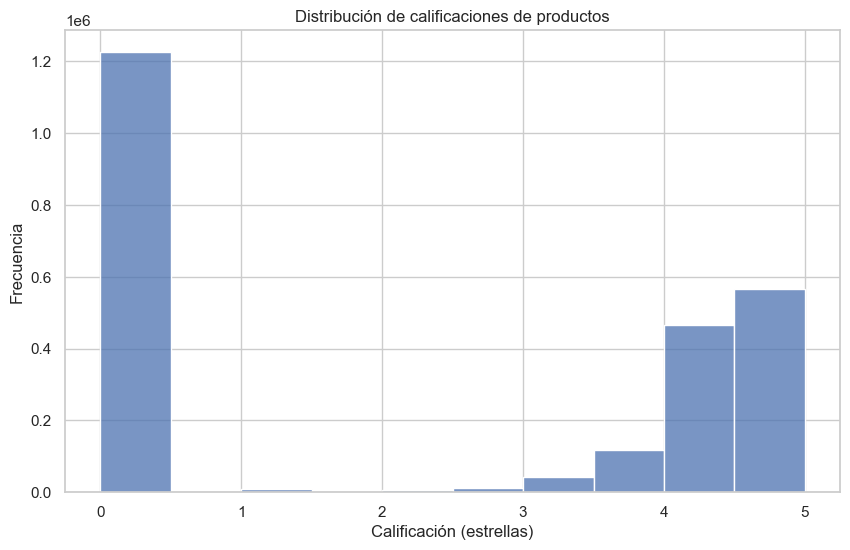

In [ ]:
## Visualización: histograma de calificaciones

sns.histplot(df['stars'], bins=10, kde=False)
plt.title('Distribución de calificaciones de productos')
plt.xlabel('Calificación (estrellas)')
plt.ylabel('Frecuencia')
plt.show()